In [ ]:
"""
File: train_emotion_classifier.py
Author: Octavio Arriaga
Email: arriaga.camargo@gmail.com
Github: https://github.com/oarriaga
Description: Train emotion classification model
"""

In [20]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

from cnn import mini_XCEPTION
from utils.datasets import DataManager
from utils.datasets import split_data
from utils.preprocessor import preprocess_input
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
import tensorflow as tf
from keras import backend
backend.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:1']

In [2]:
# parameters
batch_size = 32
num_epochs = 10000
input_shape = (64, 64, 1)
validation_split = .2
verbose = 1
num_classes = 7
patience = 50
base_path = '/data/emotion_models/'

In [3]:
# data generator

# model parameters/compilation
model = mini_XCEPTION(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 8)    72          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 62, 62, 8)    32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 62, 62, 8)    0           batch_normalization_1[0][0]      
_____________________________________

In [7]:
dataset_name = 'fer2013'

In [8]:
log_file_path = base_path + dataset_name + '_emotion_training.log'
csv_logger = CSVLogger(log_file_path, append=False)
early_stop = EarlyStopping('val_loss', patience=patience)
reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                              patience=int(patience/4), verbose=1)
trained_models_path = base_path + dataset_name + '_mini_XCEPTION'
model_names = trained_models_path + '.{epoch:02d}-{val_acc:.2f}.hdf5'
model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                save_best_only=True)
callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

In [10]:
train_data_dir = "/root/finalproject/tensorflow-for-poets-2/tf_files/Training"

In [57]:
IM_WIDTH, IM_HEIGHT = 64, 64 #fixed size for InceptionV3
NB_EPOCHS = 50
BAT_SIZE = 32
FC_SIZE = 1024
NB_IV3_LAYERS_TO_FREEZE = 172

In [58]:

data_generator = ImageDataGenerator(
                        preprocessing_function=preprocess_input,
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True,
                        validation_split=0.2)
    
train_generator = data_generator.flow_from_directory(
train_data_dir,
target_size=(IM_WIDTH, IM_HEIGHT),
batch_size=BAT_SIZE,
subset='training',
color_mode="grayscale")

validation_generator = data_generator.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(IM_WIDTH, IM_HEIGHT),
    batch_size=BAT_SIZE,
    subset='validation',
color_mode="grayscale")


Found 22970 images belonging to 7 classes.
Found 5739 images belonging to 7 classes.


(32, 64, 64, 1)
(64, 64, 1)


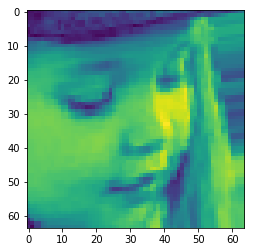

In [59]:
x,y = train_generator.next()
# for i in range(0,1):
#     image = x[i]
#     plt.imshow(image.transpose(2,1,0))
#     plt.show()
print(x.shape)
image = x[2]
print(image.shape)
plt.imshow(image.reshape(IM_WIDTH, IM_HEIGHT))
plt.show()

In [60]:


model.fit_generator( 
    train_generator,
    steps_per_epoch = train_generator.samples // BAT_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BAT_SIZE,
    epochs=NB_EPOCHS, verbose=1, callbacks=callbacks)

Epoch 1/50
717/717 [==============================] - 47s 65ms/step - loss: 1.8064 - acc: 0.3106 - val_loss: 1.7123 - val_acc: 0.3453

Epoch 00001: val_loss improved from inf to 1.71225, saving model to /data/emotion_models/fer2013_mini_XCEPTION.01-0.35.hdf5
Epoch 2/50
717/717 [==============================] - 42s 59ms/step - loss: 1.5491 - acc: 0.4186 - val_loss: 1.6067 - val_acc: 0.3932

Epoch 00002: val_loss improved from 1.71225 to 1.60671, saving model to /data/emotion_models/fer2013_mini_XCEPTION.02-0.39.hdf5
Epoch 3/50
717/717 [==============================] - 42s 59ms/step - loss: 1.4238 - acc: 0.4713 - val_loss: 1.5781 - val_acc: 0.4310

Epoch 00003: val_loss improved from 1.60671 to 1.57814, saving model to /data/emotion_models/fer2013_mini_XCEPTION.03-0.43.hdf5
Epoch 4/50
717/717 [==============================] - 43s 60ms/step - loss: 1.3481 - acc: 0.4966 - val_loss: 1.4967 - val_acc: 0.4673

Epoch 00004: val_loss improved from 1.57814 to 1.49667, saving model to /data/em

In [ ]:
datasets = ['fer2013']
for dataset_name in datasets:
    print('Training dataset:', dataset_name)

    # callbacks
    log_file_path = base_path + dataset_name + '_emotion_training.log'
    csv_logger = CSVLogger(log_file_path, append=False)
    early_stop = EarlyStopping('val_loss', patience=patience)
    reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,
                                  patience=int(patience/4), verbose=1)
    trained_models_path = base_path + dataset_name + '_mini_XCEPTION'
    model_names = trained_models_path + '.{epoch:02d}-{val_acc:.2f}.hdf5'
    model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,
                                                    save_best_only=True)
    callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

    # loading dataset
    data_loader = DataManager(dataset_name, image_size=input_shape[:2])
    faces, emotions = data_loader.get_data()
    faces = preprocess_input(faces)
    num_samples, num_classes = emotions.shape
    train_data, val_data = split_data(faces, emotions, validation_split)
    train_faces, train_emotions = train_data
    